In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/Airplane_Crashes_and_Fatalities.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


#### Data Preprocessing & Exploration

##### Date conversion first

In [3]:
 # Convert the date column to datetime (assuming column name is 'date' and format MM/DD/YYYY)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors='coerce')
    
# Create new columns for Month and Year based on the date
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [4]:
from datetime import datetime
def classify_time(time_str):
    """
    Convert a time string (HH:MM) into a time period label:
      - "Overnight": 00:00 <= time < 06:00
      - "Morning":   06:00 <= time < 12:00
      - "Afternoon": 12:00 <= time < 18:00
      - "Night":     18:00 <= time < 24:00
    If parsing fails, returns "Unknown".
    """
    try:
        dt = datetime.strptime(time_str, "%H:%M")
        hour = dt.hour
        if 0 <= hour < 6:
            return "Overnight"
        elif 6 <= hour < 12:
            return "Morning"
        elif 12 <= hour < 18:
            return "Afternoon"
        elif 18 <= hour < 24:
            return "Night"
        else:
            return "Unknown"
    except Exception:
        return "Unknown"

In [5]:
df["TimePeriod"] = df["Time"].apply(classify_time)

In [6]:
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Month,Year,TimePeriod
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,1908,Afternoon
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,9,1909,Unknown
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,1912,Morning
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8,1913,Unknown
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,9,1913,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2019-04-16,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",4,2019,Morning
4963,2019-05-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,5,2019,Night
4964,2019-05-05,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,5,2019,Night
4965,2019-06-03,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,6,2019,Afternoon


In [7]:
##Now since we don't need the date and time fields let's drop them
df_clean=df.drop(['Date','Time'],axis=1)

In [8]:
df_clean

,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Month,Year,TimePeriod
0,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,1908,Afternoon
1,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,9,1909,Unknown
2,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,1912,Morning
3,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8,1913,Unknown
4,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,9,1913,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",4,2019,Morning
4963,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,5,2019,Night
4964,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,5,2019,Night
4965,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,6,2019,Afternoon


In [9]:
def explore_data(df):
    """Performs initial exploratory data analysis."""
    print("📌 Column Data Types:\n", df.dtypes)
    print("=== DataFrame Info ===",df.info())
    print("📈 Summary Statistics:\n", df.describe(),"\n")
    print("🔍 Unique Values:"
          "\n", df.nunique(),"\n")
    print("🔍 Null Values:", "\n", df.isnull().sum(),"\n")
    print("🔍 Duplicate Rows:\n", df.duplicated().sum(),"\n")


In [10]:
explore_data(df_clean)

📌 Column Data Types:
 Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
Month                      int32
Year                       int32
TimePeriod                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               4963 non-null   object 
 1   Operator               4957 non-null   object 
 2   Flight #               1315 non-null   object 
 3 

In [11]:
# Summary statistics for categorical columns
print("=== Summary Statistics (Categorical) ===")
print(df_clean.describe(include=['object']), "\n")

=== Summary Statistics (Categorical) ===
              Location  Operator Flight #     Route       AC Type  \
count             4963      4957     1315      4192          4952   
unique            4101      2242      883      3799          2447   
top     Moscow, Russia  Aeroflot        -  Training  Douglas DC-3   
freq                17       255       36        92           333   

       Registration cn/ln                               Summary TimePeriod  
count          4694  4299                                  4903       4967  
unique         4661  3869                                  4808          5  
top              49     1  Crashed under unknown circumstances.    Unknown  
freq              3     8                                     9       1513   



In [12]:
### Observations (written on a whim)
"""
-Moderatly sized dataset with 4,967 rows and 18 columns, 
-From the stats, on average, there are about 31 people aboard a flight, but with a range from 0 to 644, there are clearly some outlier events or larger aircraft in the mix. 
- Fatalities average around 22, though again the spread shows variation.
-It is better to encode the nominal values such that we will be to use them in the correlation matrix, entre autre.
-Even before, it is perhaps better to retract the values for Location to have only the country, and the Operator to have categorical values like military, commercial, etc.
-most of the flight numbers are missing and the ones that are not are unique, the opposite is true for the Route collumn
-"Month", "Year", and "TimePeriod" have no missing values, ensuring you can still reliably analyze trends over time.
- No duplicate rows shows that every record is unique
-Some Categorical values are not in the same format, so we will have to clean them up, NaN into Unknown
-Fatalities aboard range from 0 to 583.
-Ground deaths range from 0 to 2,750.
-Summary contains 64 unrecorded causes.

"""

'\n-Moderatly sized dataset with 4,967 rows and 18 columns, \n-From the stats, on average, there are about 31 people aboard a flight, but with a range from 0 to 644, there are clearly some outlier events or larger aircraft in the mix. \n- Fatalities average around 22, though again the spread shows variation.\n-It is better to encode the nominal values such that we will be to use them in the correlation matrix, entre autre.\n-Even before, it is perhaps better to retract the values for Location to have only the country, and the Operator to have categorical values like military, commercial, etc.\n-most of the flight numbers are missing and the ones that are not are unique, the opposite is true for the Route collumn\n-"Month", "Year", and "TimePeriod" have no missing values, ensuring you can still reliably analyze trends over time.\n- No duplicate rows shows that every record is unique\n-Some Categorical values are not in the same format, so we will have to clean them up, NaN into Unknown\

In [ ]:
##nan values by unknown (this goes for all categorical columns)
columns_to_fill = ['Operator', 'Flight #', 'Route', 'AC Type', 'Registration']
df_clean.loc[:, columns_to_fill] = df_clean.loc[:, columns_to_fill].fillna('Unknown')

#### Here we are solving the encodding problem

In [14]:
##checking the unique values first to see how to approach them
print(df_clean['Location'].nunique())#4101
uv_loc = df_clean['Location'].unique()
print(uv_loc)

4101
['Fort Myer, Virginia' 'Juvisy-sur-Orge, France'
 'Atlantic City, New Jersey' ... 'Near Monclava, Mexico'
 'Near Lipo, India' 'Rawalpindi, India']


In [15]:
df_clean['Location'] = df_clean['Location'].str.split(', ').str[-1]

In [16]:
print(df_clean['Location'].nunique())
uv_loc = df_clean['Location'].unique()
print(uv_loc) #absolutely waay better, now we are left with 553 unique locations

553
['Virginia' 'France' 'New Jersey' 'Canada' 'Over the North Sea' 'Germany'
 'Belgium' 'Bulgeria' 'England' 'Off Northern Germany' 'North Sea'
 'Off western Denmark' 'Over the Mediterranean' 'Ohio' 'Pennsylvania'
 'Illinois' 'Italy' 'Maryland' 'Kent' 'UK' 'Indiana' 'Iowa' 'Columbia'
 'Spain' 'Wyoming' 'Minnisota' 'Wisconsin' 'Off Gibraltar' 'Nevada'
 'Australia' 'NY' 'North Atlantic Ocean' 'China' 'Morocco'
 'United Kingdom' 'Romania' 'Russia' 'Over the Mediterranean Sea' 'WY'
 'Over the English Channel' 'Colombia' 'United States' 'USSR' 'Hungary'
 'Mauritania' 'English Channel' 'Czechoslovakia' 'New York'
 'Unied Kingdom' 'Oregon' 'Idaho' 'Algeria' 'Connecticut' 'Atlantic Ocean'
 'Over the Gulf of Finland' 'Near Marseille,France' 'Uruguay' 'Ariège'
 'Nebraska' 'Brazil' 'Minnesota' 'Kansas' 'Netherlands' 'Texas'
 'Near Rio de Janeiro,Brazil' 'Washington' 'Tennessee' 'Greece'
 'Off Morocco' 'West Virginia' 'California' 'Mexico' ' Pest Hungary'
 'Algiers' 'Cuba' 'New Mexico' 'Iran' 'On

In [17]:
## now we encode the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['Location_encoded'] = le.fit_transform(df_clean['Location'])


In [18]:
##Now same with the Operator, let's check it first and do the necessary cleaning
df_clean['Operator'] = df_clean['Operator'].str.replace('U.S.', 'US', regex=False) ##did this because later on the regex pattern will work on all countries but the US one
print(df_clean['Operator'].nunique())##2242
uv_op = df_clean['Operator'].unique()
print(uv_op)

2240
['Military - US Army' 'Unknown' 'Military - US Navy' ...
 'Archipelagos Service Aereos' 'TVPX Aircraft Solutions'
 'Aeroflot Russian International Airlines']


In [19]:
#we can start by modifing the regex pattern to match any country after "Military -" and keep only "Military - [Country]"
df_clean['Operator'] = df_clean['Operator'].str.replace(r'Military - (\w+).*', r'Military - \1', regex=True)

print(df_clean['Operator'].nunique())## should be 2155
df_clean['Operator_encoded'] = le.fit_transform(df_clean['Operator'])
df_clean


2156


,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Month,Year,TimePeriod,Location_encoded,Operator_encoded
0,Virginia,Military - US,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,1908,Afternoon,524,1331
1,France,Unknown,Unknown,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,9,1909,Unknown,173,2056
2,New Jersey,Military - US,Unknown,Test flight,Dirigible,Unknown,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,1912,Morning,329,1331
3,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8,1913,Unknown,106,1560
4,Over the North Sea,Military - German,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,9,1913,Night,395,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,Chile,Archipelagos Service Aereos,Unknown,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",4,2019,Morning,117,389
4963,Mexico,TVPX Aircraft Solutions,Unknown,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,5,2019,Night,284,1896
4964,Russia,Aeroflot Russian International Airlines,Unknown,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,5,2019,Night,428,96
4965,India,Military - Indian,Unknown,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,6,2019,Afternoon,220,1279


In [20]:
df_clean.columns

Index(['Location', 'Operator', 'Flight #', 'Route', 'AC Type', 'Registration',
       'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
       'Fatalities Passangers', 'Fatalities Crew', 'Ground', 'Summary',
       'Month', 'Year', 'TimePeriod', 'Location_encoded', 'Operator_encoded'],
      dtype='object')

In [21]:
df_clean

,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Month,Year,TimePeriod,Location_encoded,Operator_encoded
0,Virginia,Military - US,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,1908,Afternoon,524,1331
1,France,Unknown,Unknown,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,9,1909,Unknown,173,2056
2,New Jersey,Military - US,Unknown,Test flight,Dirigible,Unknown,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,1912,Morning,329,1331
3,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8,1913,Unknown,106,1560
4,Over the North Sea,Military - German,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,9,1913,Night,395,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,Chile,Archipelagos Service Aereos,Unknown,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",4,2019,Morning,117,389
4963,Mexico,TVPX Aircraft Solutions,Unknown,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,5,2019,Night,284,1896
4964,Russia,Aeroflot Russian International Airlines,Unknown,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,5,2019,Night,428,96
4965,India,Military - Indian,Unknown,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,6,2019,Afternoon,220,1279


In [22]:
print(df_clean['AC Type'].nunique())##2448
uv_AT = df_clean['AC Type'].unique()
print(uv_AT)

2448
['Wright Flyer III' 'Wright Byplane' 'Dirigible' ...
 'Canadair CL-600-2B16-Challenger' 'Sukhoi Superjet-100-95B'
 'Beechcraft B300 King Air']


In [23]:
df_clean['AC Type_encoded'] = le.fit_transform(df_clean['AC Type'])
df_clean['Route_encoded'] = le.fit_transform(df_clean['Route'])
df_clean

,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,...,Fatalities Crew,Ground,Summary,Month,Year,TimePeriod,Location_encoded,Operator_encoded,AC Type_encoded,Route_encoded
0,Virginia,Military - US,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,...,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,1908,Afternoon,524,1331,2328,1044
1,France,Unknown,Unknown,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,...,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,9,1909,Unknown,173,2056,2327,132
2,New Jersey,Military - US,Unknown,Test flight,Dirigible,Unknown,NaN,5.0,0.0,5.0,...,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,1912,Morning,329,1331,992,3477
3,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,NaN,1.0,0.0,1.0,...,1.0,0.0,The first fatal airplane accident in Canada oc...,8,1913,Unknown,106,1560,951,3613
4,Over the North Sea,Military - German,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,NaN,20.0,NaN,NaN,...,NaN,0.0,The airship flew into a thunderstorm and encou...,9,1913,Night,395,1272,2343,3613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,Chile,Archipelagos Service Aereos,Unknown,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,...,1.0,0.0,"While the aircraft was in the initial climb, p...",4,2019,Morning,117,389,1966,2847
4963,Mexico,TVPX Aircraft Solutions,Unknown,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,...,2.0,0.0,The aircraft crashed while en route on a retur...,5,2019,Night,284,1896,782,1831
4964,Russia,Aeroflot Russian International Airlines,Unknown,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,...,1.0,0.0,Forty-five minutes after taking off from Mosco...,5,2019,Night,428,96,2162,2346
4965,India,Military - Indian,Unknown,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,...,8.0,0.0,Crashed about 34km WNW of Mechuka.,6,2019,Afternoon,220,1279,200,53


In [24]:
explore_data(df_clean)

📌 Column Data Types:
 Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
Month                      int32
Year                       int32
TimePeriod                object
Location_encoded           int32
Operator_encoded           int32
AC Type_encoded            int32
Route_encoded              int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location              

#### Other Interesting features to add 

In [29]:
###Safety & Severity Metrics
#Fatality Rate
df_clean['Fatality Rate'] = df_clean['Fatalities'] / df_clean['Aboard']
#Survival Rate
df_clean['Survival Rate'] = 1 - df_clean['Fatality Rate']


In [33]:
df_clean['Season'] = df_clean['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Fall', 10: 'Fall', 11: 'Fall'})


In [34]:
df_clean

,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,...,Month,Year,TimePeriod,Location_encoded,Operator_encoded,AC Type_encoded,Route_encoded,Fatality Rate,Survival Rate,Season
0,Virginia,Military - US,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,...,9,1908,Afternoon,524,1331,2328,1044,0.500000,0.500000,Fall
1,France,Unknown,Unknown,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,...,9,1909,Unknown,173,2056,2327,132,1.000000,0.000000,Fall
2,New Jersey,Military - US,Unknown,Test flight,Dirigible,Unknown,NaN,5.0,0.0,5.0,...,7,1912,Morning,329,1331,992,3477,1.000000,0.000000,Summer
3,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,NaN,1.0,0.0,1.0,...,8,1913,Unknown,106,1560,951,3613,1.000000,0.000000,Summer
4,Over the North Sea,Military - German,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,NaN,20.0,NaN,NaN,...,9,1913,Night,395,1272,2343,3613,0.700000,0.300000,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,Chile,Archipelagos Service Aereos,Unknown,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,...,4,2019,Morning,117,389,1966,2847,1.000000,0.000000,Spring
4963,Mexico,TVPX Aircraft Solutions,Unknown,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,...,5,2019,Night,284,1896,782,1831,1.000000,0.000000,Spring
4964,Russia,Aeroflot Russian International Airlines,Unknown,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,...,5,2019,Night,428,96,2162,2346,0.525641,0.474359,Spring
4965,India,Military - Indian,Unknown,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,...,6,2019,Afternoon,220,1279,200,53,1.000000,0.000000,Summer


In [45]:
import os
###Now let's save this and go do some clustering, NLP,LLM and more!
df_clean.to_csv(os.path.join('../data', 'airplane_clean.csv'), index=False)

#### Visualization

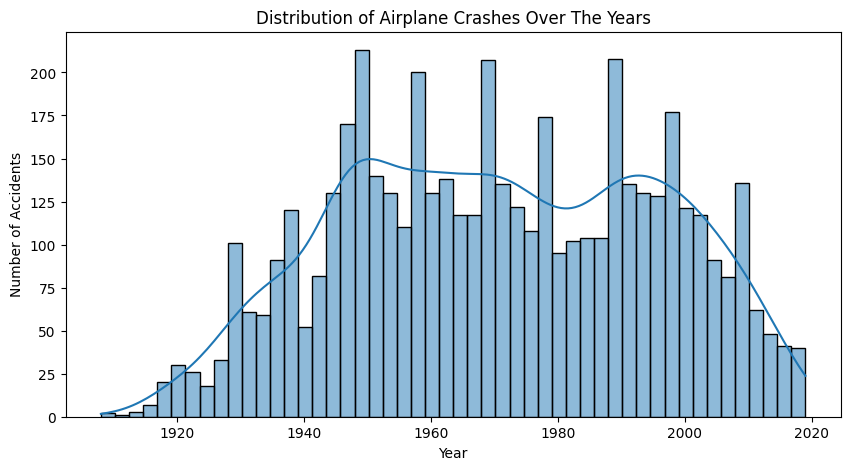

In [26]:
#Distribution of Airplane Crashes Over the years
plt.figure(figsize=(10, 5))
sns.histplot(df['Year'].dropna(), bins=50, kde=True)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Airplane Crashes Over The Years')
plt.show()

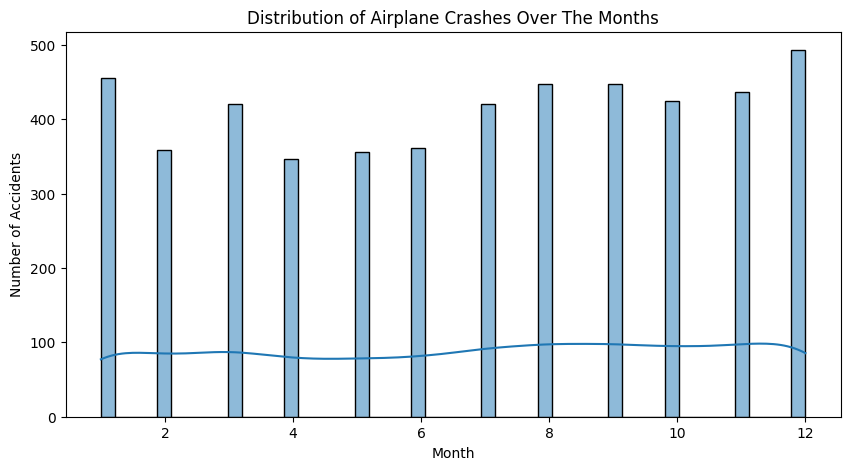

In [27]:
#Distribution of Airplane Crashes Over The Months (Perhaps it has peaks in certain seasons/months?)
plt.figure(figsize=(10, 5))
sns.histplot(df['Month'].dropna(), bins=50, kde=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Airplane Crashes Over The Months')
plt.show()

C:\Users\ikgha\AppData\Local\Temp\ipykernel_16064\330409830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='Operator', order=df_clean['Operator'].value_counts().index[:10], palette='viridis')


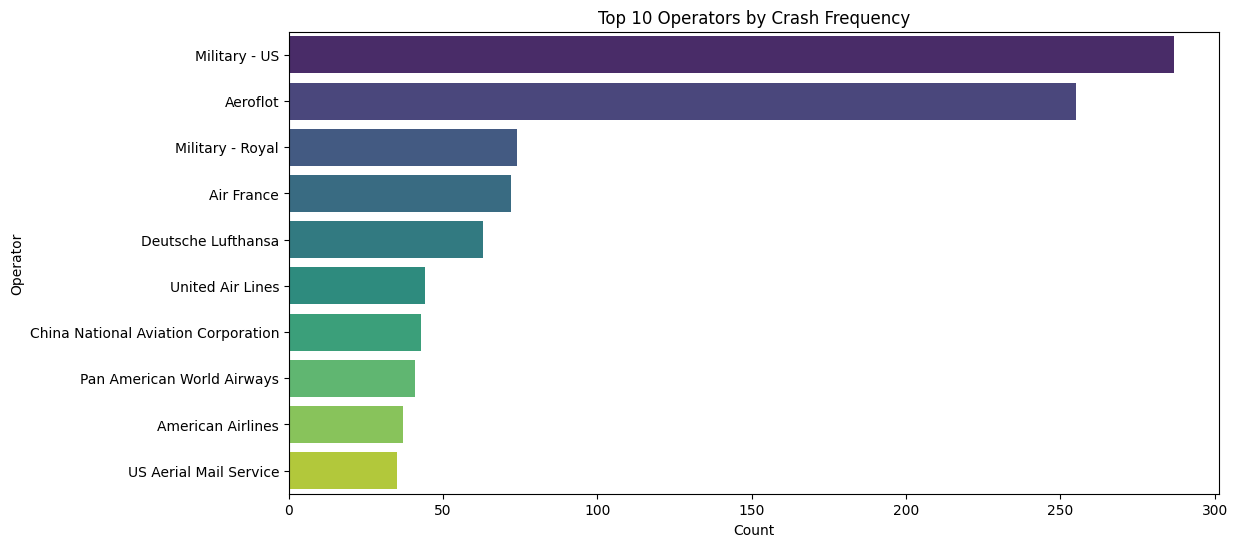

In [38]:
# Bar plot of crash frequency by Operator
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y='Operator', order=df_clean['Operator'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Operators by Crash Frequency')
plt.xlabel('Count')
plt.ylabel('Operator')
plt.show()

In [ ]:
# Example: Stacked bar plot of fatalities by region and operator
# fatalities_by_operator_region = df_clean.groupby(['Location', 'Operator'])['Fatalities'].sum().unstack()

# fatalities_by_operator_region.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='coolwarm')
# plt.title('Fatalities by Operator and Location')
# plt.xlabel('Region')
# plt.ylabel('Total Fatalities')
# plt.legend(title='Operator')
# plt.show()

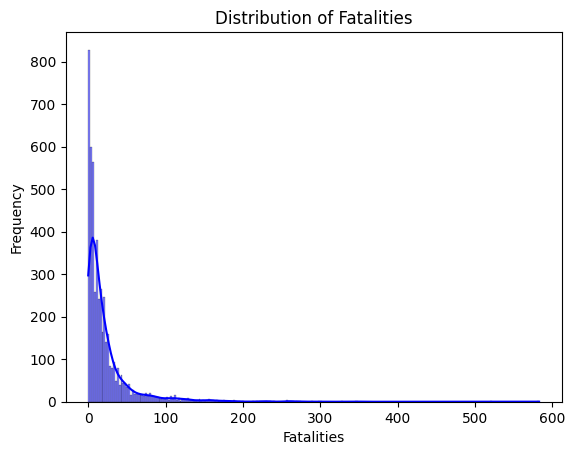

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of fatalities
sns.histplot(df['Fatalities'], kde=True, color='blue')
plt.title('Distribution of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Example of loading shapefile for a country or region
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Plot world map and overlay incident data
# ax = world.plot(figsize=(10, 10))
# df.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', color='red', alpha=0.5)
# plt.show()